In [1]:
import numpy as np
import matplotlib.pyplot as plt

from problem import Problem
from algorithms import Sarsa, QLearning

In [2]:
for i in range(20):
    print(Sarsa.choose_action().name, end=', ')

B, A, B, A, B, B, B, B, A, B, B, B, A, B, B, B, B, B, B, B, 

In [3]:
p = Problem()
p.transition_probs.shape

(2, 7, 7)

In [4]:
p.transition_probs_a


array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [5]:
p.transition_probs_b

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        ]])

In [6]:
for i in range(10):
    print(p.take_action(p.State.S1, p.Action.A).name, end=", ")

S7, S7, S7, S7, S7, S7, S7, S7, S7, S7, 

In [7]:
for i in range(10):
    print(p.take_action(p.State.S1, p.Action.B).name, end=", ")

S4, S5, S4, S5, S4, S6, S2, S5, S4, S4, 

In [8]:
sarsa = Sarsa(p, 15)
sarsa.phi.shape

(7, 2, 15)

In [9]:
sarsa.phi[:, 0]

array([[2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
sarsa.phi[:, 1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [11]:
w_init = np.array(6*[1] + [10] + 8 * [1]).astype(float)
w_init

array([ 1.,  1.,  1.,  1.,  1.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [12]:
sarsa.phi @ w_init

array([[ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [ 3.,  1.],
       [12.,  1.]])

In [13]:
sarsa.phi[6, 0] @ w_init

np.float64(12.0)

In [14]:
sarsa.phi[6] @ w_init


array([12.,  1.])

In [15]:
sarsa_w_norms, sarsa_states, sarsa_actions = sarsa.run(w_init=w_init, n_steps=20, keep_trajectory=True)
for s, a in zip(sarsa_states, sarsa_actions):
    print(f"{s.name}, {a.name}, ", end='')
print(sarsa_states[-1].name)

S3, B, S6, A, S7, B, S6, B, S6, B, S1, B, S1, B, S2, A, S7, B, S5, B, S2, B, S1, B, S2, B, S1, B, S6, B, S4, B, S5, B, S3, B, S3, A, S7, A, S7


In [16]:
sarsa_w_norms

array([10.67707825, 10.67894134, 10.67338785, 10.67337848, 10.67336911,
       10.67335984, 10.67335047, 10.67519511, 10.66973152, 10.66972224,
       10.66971287, 10.6697215 , 10.6696935 , 10.66970178, 10.66967379,
       10.6696646 , 10.66965514, 10.66966414, 10.67150715, 10.69782782,
       10.57440367])

In [17]:
N_STEPS = 500
N_RUNS = 20

In [18]:
sarsa_w_norms_proper = sarsa.run_multiple(w_init=w_init, n_steps=N_STEPS, n_runs=N_RUNS)

  0%|          | 0/20 [00:00<?, ?it/s]

In [19]:
ql = QLearning(p, n_params=15)

In [20]:
ql_w_norms_proper = ql.run_multiple(w_init=w_init, n_steps=N_STEPS, n_runs=N_RUNS)


  0%|          | 0/20 [00:00<?, ?it/s]

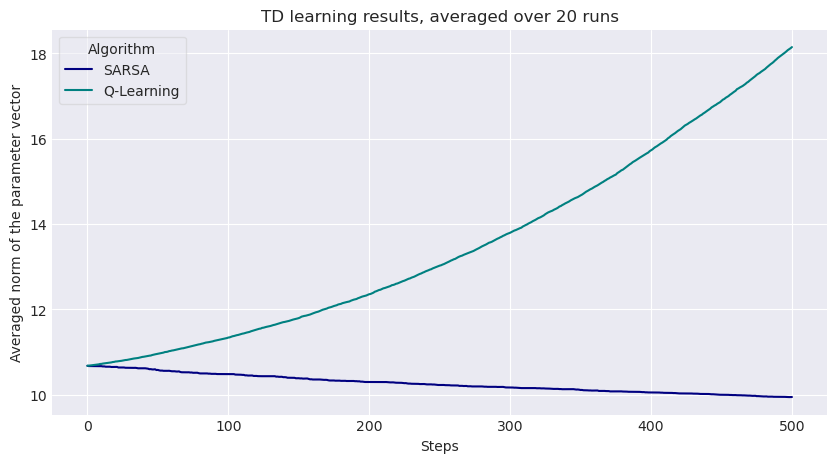

In [21]:
%matplotlib inline

SARSA_COLOUR = 'navy'
QL_COLOUR = 'teal'

with plt.style.context('seaborn-v0_8-darkgrid'):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(np.arange(len(sarsa_w_norms_proper)), sarsa_w_norms_proper, label='SARSA', c=SARSA_COLOUR)
    ax.plot(np.arange(len(ql_w_norms_proper)), ql_w_norms_proper, label='Q-Learning', c=QL_COLOUR)

    ax.legend(frameon=True, fancybox=True, framealpha=0.5, title="Algorithm")
    ax.set_xlabel("Steps")
    ax.set_ylabel("Averaged norm of the parameter vector")
    ax.set_title(f"TD learning results, averaged over {N_RUNS} runs")

